In [ ]:
import numpy as np
from scipy.special import jv, hyp1f1, factorial
import matplotlib.pyplot as plt

In [ ]:
def DSFFfull(n, tau):
    tau_abs = np.abs(tau)
    return 1/n + (4 * (jv(1, tau_abs)**2)) / (tau_abs**2) - (1/n) * np.exp(-(tau_abs**2 / (4 * n)))

def DSFFGinUEasymp(n, tau):
    return 1 - np.exp(-(tau**2 / (4 * n)))

def Kcfull(tau, N):
    tau_squared = tau**2
    first_term = N
    second_term = N**2 * hyp1f1(N + 1, 2, -tau_squared / (4 * N))**2
    double_sum = 0
    for p in range(N):
        for s in range(N):
            max_ps = max(p, s)
            abs_diff = np.abs(p - s)
            factor = (factorial(max_ps) * tau**abs_diff) / (factorial(abs_diff) * 2**abs_diff * N**max_ps)
            term = hyp1f1(max_ps + 1, abs_diff + 1, -tau_squared / (4 * N))
            double_sum += (N**(p + s) / (factorial(p) * factorial(s))) * (factor * term)**2
    return first_term + second_term - double_sum

# Example plotting
tau_values = np.linspace(1, 100, 10000)
n = 100
N = 100

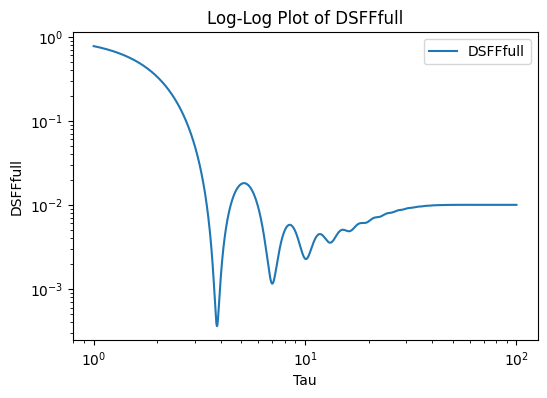

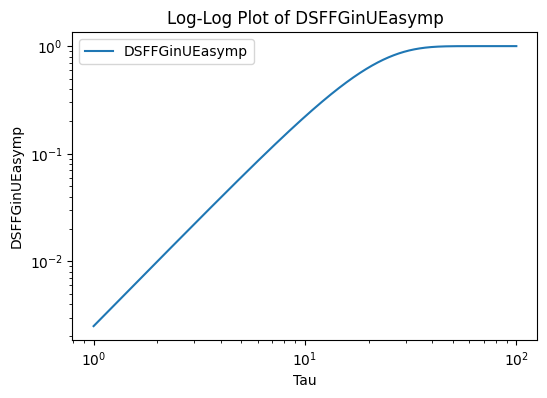

In [ ]:
# Plot DSFFfull
plt.figure(figsize=(6, 4))
plt.loglog(tau_values, [DSFFfull(n, tau) for tau in tau_values], label='DSFFfull')
plt.xlabel('Tau')
plt.ylabel('DSFFfull')
plt.title('Log-Log Plot of DSFFfull')
plt.legend()
plt.show()

# Plot DSFFGinUEasymp
plt.figure(figsize=(6, 4))
plt.loglog(tau_values, [DSFFGinUEasymp(n, tau) for tau in tau_values], label='DSFFGinUEasymp')
plt.xlabel('Tau')
plt.ylabel('DSFFGinUEasymp')
plt.title('Log-Log Plot of DSFFGinUEasymp')
plt.legend()
plt.show()

In [ ]:
n = 50

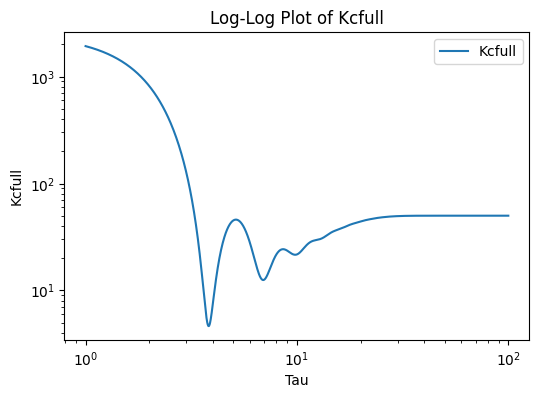

In [ ]:
# Plot Kcfull - This may take longer due to the double summation
plt.figure(figsize=(6, 4))
plt.loglog(tau_values, [Kcfull(tau, n) for tau in tau_values], label='Kcfull')
plt.xlabel('Tau')
plt.ylabel('Kcfull')
plt.title('Log-Log Plot of Kcfull')
plt.legend()
plt.show()